In [161]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [162]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [163]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [164]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_str = "06"


In [165]:
#  3. Convert the June temperatures to a list.
resultsJun = []
resultsJun = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month_str).all()

In [166]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(resultsJun, columns=['date','tobs'])
june_temps_df.rename(columns={"tobs":"June Temps"}, inplace = True)
june_temps_df.dtypes

date           object
June Temps    float64
dtype: object

In [167]:
june_temps_df["date"] = pd.to_datetime(june_temps_df["date"])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
june_temps_df = june_temps_df.sort_index()
june_temps_df

,date,June Temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [168]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [169]:
june_temps_df.groupby([pd.Grouper(key="date", axis=0, freq="Y")]).describe()

June Temps                                                   
                count       mean       std   min   25%   50%   75%   max
date                                                                    
2010-12-31      242.0  74.925620  2.823039  67.0  73.0  75.0  77.0  85.0
2011-12-31      227.0  73.938326  2.869689  65.0  72.0  74.0  76.0  82.0
2012-12-31      211.0  74.000000  2.865227  68.0  72.0  74.0  76.0  81.0
2013-12-31      217.0  74.599078  3.203094  66.0  72.0  75.0  77.0  81.0
2014-12-31      215.0  75.027907  3.551907  67.0  72.0  75.0  78.0  84.0
2015-12-31      203.0  74.990148  3.583502  66.0  72.0  76.0  78.0  81.0
2016-12-31      194.0  75.175258  3.421996  64.0  73.0  75.5  78.0  81.0
2017-12-31      191.0  77.219895  2.622538  71.0  75.0  77.0  79.0  83.0

In [170]:
yearly_jun_status_df = june_temps_df.groupby([pd.Grouper(key="date", axis=0, freq="Y")]).describe()
yearly_jun_mean = june_temps_df.groupby([pd.Grouper(key="date", axis=0, freq="Y")]).mean()
yearly_jun_mean.index.name = None
yearly_jun_mean = yearly_jun_mean[["June Temps"]]
yearly_jun_mean.index.name = "Year"
yearly_jun_mean

,June Temps
Year,
2010-12-31,74.925620
2011-12-31,73.938326
2012-12-31,74.000000
2013-12-31,74.599078
2014-12-31,75.027907
2015-12-31,74.990148
2016-12-31,75.175258
2017-12-31,77.219895


## D2: Determine the Summary Statistics for December

In [171]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_str = "12"

In [172]:
# 7. Convert the December temperatures to a list.
resultsDec = []
resultsDec = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month_str).all()

In [173]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(resultsDec, columns=['date','tobs'])
dec_temps_df.rename(columns={"tobs":"December Temps"}, inplace = True)
dec_temps_df.dtypes

date               object
December Temps    float64
dtype: object

In [174]:
dec_temps_df["date"] = pd.to_datetime(dec_temps_df["date"])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)
dec_temps_df = dec_temps_df.sort_index()
dec_temps_df

,date,December Temps
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [175]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [176]:
dec_temps_df.groupby(pd.Grouper(key="date", axis=0, freq="Y")).describe()

December Temps                                                   
                    count       mean       std   min   25%   50%   75%   max
date                                                                        
2010-12-31          235.0  70.208511  3.915116  58.0  68.0  70.0  73.0  80.0
2011-12-31          223.0  70.820628  2.388811  63.0  69.0  71.0  72.0  77.0
2012-12-31          218.0  71.188073  3.743682  61.0  69.0  72.0  74.0  80.0
2013-12-31          234.0  71.094017  3.457859  63.0  69.0  71.0  73.0  83.0
2014-12-31          223.0  69.896861  4.733734  56.0  67.0  70.0  73.5  81.0
2015-12-31          184.0  73.423913  3.112582  65.0  71.0  74.0  75.0  82.0
2016-12-31          200.0  71.130000  3.419292  60.0  69.0  71.0  74.0  78.0

In [177]:
yearly_dec_status_df = dec_temps_df.groupby([pd.Grouper(key="date", axis=0, freq="Y")]).describe()
yearly_dec_mean = dec_temps_df.groupby([pd.Grouper(key="date", axis=0, freq="Y")]).mean()
yearly_dec_mean.index.name = None
yearly_dec_mean = yearly_dec_mean[["December Temps"]]
yearly_dec_mean.index.name = "Year"
yearly_dec_mean

,December Temps
Year,
2010-12-31,70.208511
2011-12-31,70.820628
2012-12-31,71.188073
2013-12-31,71.094017
2014-12-31,69.896861
2015-12-31,73.423913
2016-12-31,71.130000


In [178]:
temps_means_df = pd.merge(yearly_jun_mean, yearly_dec_mean, on="Year")
temps_means_df.reset_index(inplace=True)
temps_means_df["Year"] = temps_means_df["Year"].dt.year
temps_means_df["Temp Differences"] = temps_means_df["June Temps"] - temps_means_df["December Temps"]
temps_means_df

,Year,June Temps,December Temps,Temp Differences
0,2010,74.925620,70.208511,4.717109
1,2011,73.938326,70.820628,3.117698
2,2012,74.000000,71.188073,2.811927
3,2013,74.599078,71.094017,3.505061
4,2014,75.027907,69.896861,5.131046
5,2015,74.990148,73.423913,1.566235
6,2016,75.175258,71.130000,4.045258


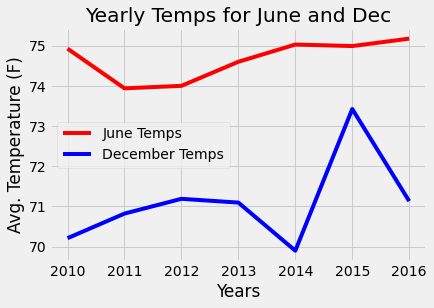

In [179]:
plt.plot(temps_means_df["Year"], temps_means_df["June Temps"], color='red')
plt.plot(temps_means_df["Year"], temps_means_df["December Temps"], color='blue')
plt.title("Yearly Temps for June and Dec")
plt.xlabel("Years")
plt.ylabel("Avg. Temperature (F)")
plt.legend(["June Temps", "December Temps"])
plt.show()